In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install tsai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 241 kB 2.6 MB/s 
     |████████████████████████████████| 750.6 MB 10 kB/s 
     |████████████████████████████████| 2.5 MB 37.3 MB/s 
     |████████████████████████████████| 19.1 MB 1.3 MB/s 
     |████████████████████████████████| 19.1 MB 690 kB/s 
     |████████████████████████████████| 21.0 MB 1.2 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
    Uninstalling torchvision-0.13.1+cu113:
      Successfully uninstalled torchvision-0.13.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.1 

In [3]:
!pip install torch==1.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 776.3 MB 11 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0
    Uninstalling torch-1.11.0:
      Successfully uninstalled torch-1.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsai 0.3.1 requires torch<1.12,>=1.7.0, but you have torch 1.12.1 which is incompatible.
torchvision 0.12.0 requires torch==1.11.0, but you have torch 1.12.1 which is incompatible.


In [5]:
# Reading Dataset
df = pd.read_excel('DATASET.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [6]:
# Checking all columns
df.columns

Index(['Unnamed: 0', 'year', 'Para-1', 'Para-2', 'Para-3', 'Para-4', 'Para-5',
       'Para-6', 'Para-7', 'Para-8', 'Para-9', 'Para-10', 'Para-11', 'Para-12',
       'Para-13'],
      dtype='object')

In [7]:
# Removing unnecessary columns and dropping filling NAN values with 0
df.drop('Unnamed: 0', axis=1, inplace=True)
df.fillna(0, inplace=True)

In [8]:
# Data preparation

# Data for 9 days for 100 samples with 13 features
X = []
# Predictors for 9, 10, 11, 12, 13 variables
Y_9 = []
Y_10 = []
Y_11 = []
Y_12 = []
Y_13 = []
i = 0
while i <= 1000:
  if (i == 920):
    i+=9
    continue
    
  d = df[i:i+10].drop('year', axis=1).to_numpy()
  x = d[:9]
  
  Y_9.append(d[9, 8])
  Y_10.append(d[9, 9])
  Y_11.append(d[9, 10])
  Y_12.append(d[9, 11])
  Y_13.append(d[9, 12])
  
  X.append(x.T)
  
  i+=10

In [9]:
# Converting to Numpy
X = np.array(X)
y_9 = np.array(Y_9).astype(np.float)
y_10 = np.array(Y_10).astype(np.float)
y_11 = np.array(Y_11).astype(np.float)
y_12 = np.array(Y_12).astype(np.float)
y_13 = np.array(Y_13).astype(np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/u

/usr/local/lib/python3.7/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /usr/local/lib/python3.7/dist-packages/torchvision/image.so: undefined symbol: _ZNK3c1010TensorImpl36is_contiguous_nondefault_policy_implENS_12MemoryFormatE
  warn(f"Failed to load image Python extension: {e}")


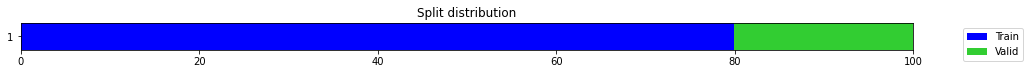

arch: TSTPlus(c_in=13 c_out=1 seq_len=9 device=cpu, arch_config={}, kwargs={})


epoch,train_loss,valid_loss,mae,_rmse,time
0,28030.572266,9497.912109,48.302998,97.457230,00:00
1,27690.781250,9535.020508,48.549690,97.647430,00:00
2,28861.855469,9550.416992,48.663868,97.726234,00:00
3,28822.431641,9561.486328,48.740578,97.782852,00:00
4,28928.246094,9568.375000,48.786087,97.818069,00:00
5,28509.162109,9573.132812,48.815845,97.842384,00:00
6,27058.841797,9576.934570,48.839149,97.861816,00:00
7,26602.583984,9581.388672,48.859676,97.884567,00:00
8,26433.513672,9583.817383,48.873863,97.896973,00:00
9,26881.701172,9585.635742,48.883553,97.906258,00:00


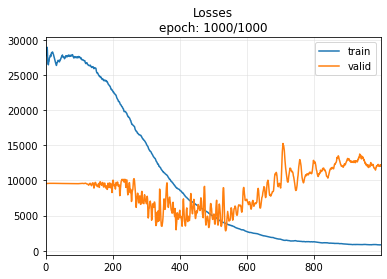

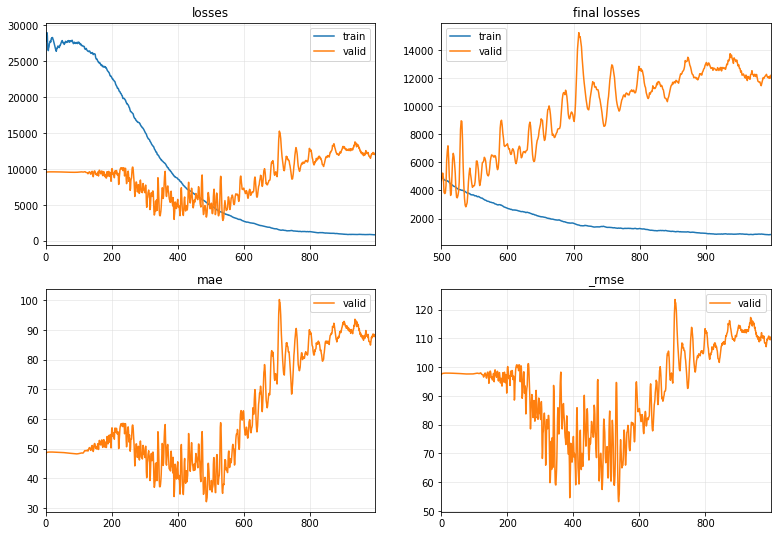

In [10]:
# Importing TSAI and its models
from tsai.all import *
# batch_tfms = TSStandardize(by_sample=False, by_var=True)

reg_9 = TSRegressor(X, y_9, path='models', arch=TSTPlus, metrics=[mae, rmse], cbs=ShowGraph(), verbose=True)
reg_9.fit_one_cycle(1000, 3e-4)

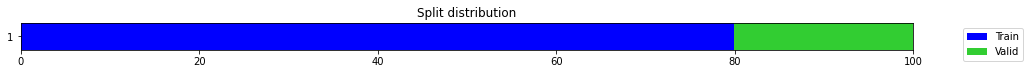

arch: TSTPlus(c_in=13 c_out=1 seq_len=9 device=cpu, arch_config={}, kwargs={})


epoch,train_loss,valid_loss,mae,_rmse,time
0,39874.730469,28438.046875,136.312454,168.635834,00:00
1,43185.652344,28288.916016,135.750885,168.193085,00:01
2,43203.046875,28217.880859,135.479645,167.981781,00:00
3,43347.343750,28170.458984,135.299484,167.840576,00:00
4,44074.542969,28139.722656,135.184860,167.748993,00:00
5,44357.753906,28120.052734,135.110519,167.690353,00:00
6,44400.968750,28103.134766,135.046173,167.639893,00:00
7,44132.949219,28091.613281,135.001541,167.605530,00:00
8,43487.976562,28081.937500,134.964203,167.576660,00:00
9,44101.332031,28074.208984,134.935181,167.553604,00:00


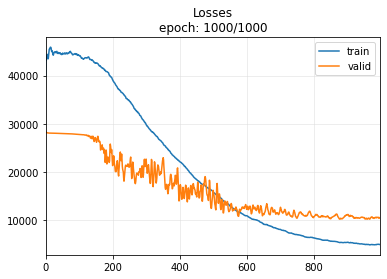

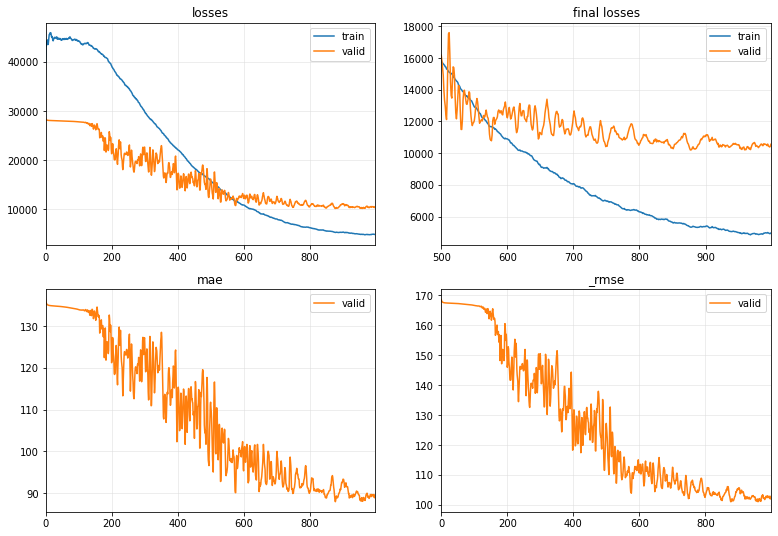

In [11]:
reg_10 = TSRegressor(X, y_10, path='models', arch=TSTPlus, metrics=[mae, rmse], cbs=ShowGraph(), verbose=True)
reg_10.fit_one_cycle(1000, 3e-4)

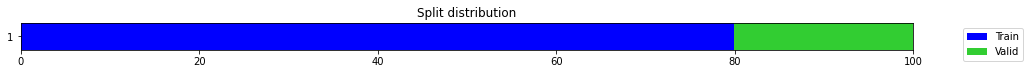

arch: TSTPlus(c_in=13 c_out=1 seq_len=9 device=cpu, arch_config={}, kwargs={})


epoch,train_loss,valid_loss,mae,_rmse,time
0,6386.121094,3571.794922,39.010826,59.764496,00:00
1,6456.928711,3565.618652,38.878681,59.712803,00:00
2,6104.621094,3563.671387,38.820656,59.696495,00:00
3,6457.991211,3563.593262,38.806633,59.695839,00:00
4,6233.294434,3562.495605,38.779732,59.686646,00:00
5,6110.545410,3562.492676,38.773132,59.686619,00:00
6,6147.062012,3561.791504,38.757584,59.680748,00:00
7,6165.000977,3561.682861,38.752331,59.679836,00:00
8,6236.247070,3561.728027,38.748970,59.680214,00:00
9,6247.491211,3561.375000,38.740025,59.677258,00:00


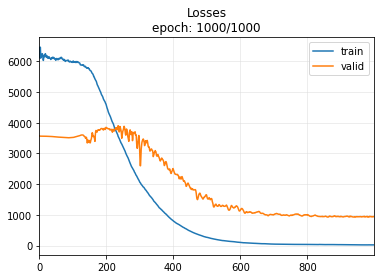

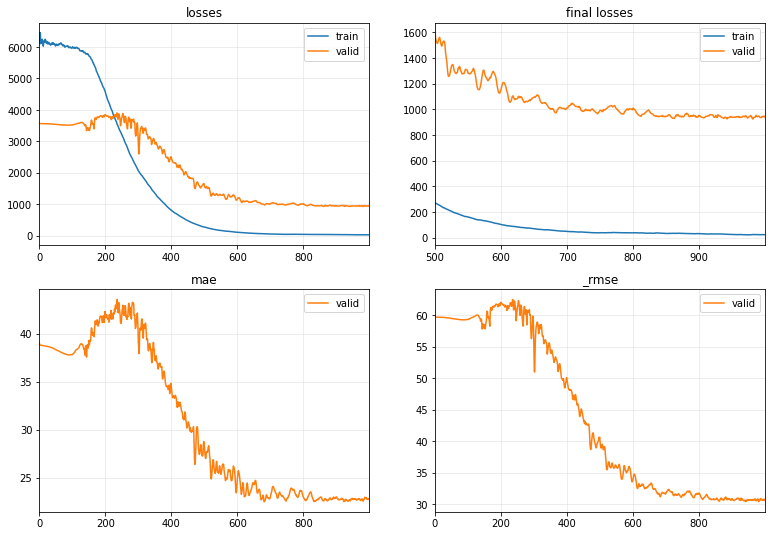

In [12]:
reg_11 = TSRegressor(X, y_11, path='models', arch=TSTPlus, metrics=[mae, rmse], cbs=ShowGraph(), verbose=True)
reg_11.fit_one_cycle(1000, 3e-4)

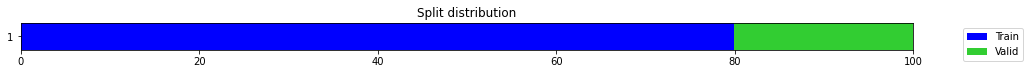

arch: TSTPlus(c_in=13 c_out=1 seq_len=9 device=cpu, arch_config={}, kwargs={})


epoch,train_loss,valid_loss,mae,_rmse,time
0,804.772949,96.893089,9.246369,9.843429,00:00
1,825.415405,103.167496,9.595419,10.157140,00:00
2,830.233398,106.642868,9.781986,10.326803,00:00
3,650.345398,108.797569,9.895124,10.430608,00:00
4,687.341797,109.946167,9.955699,10.485521,00:00
5,712.406982,110.799973,10.000488,10.526156,00:00
6,656.360901,111.743301,10.048867,10.570870,00:00
7,679.196777,112.364906,10.080629,10.600231,00:00
8,637.562439,112.847328,10.105058,10.622962,00:00
9,659.121521,113.091225,10.116934,10.634436,00:00


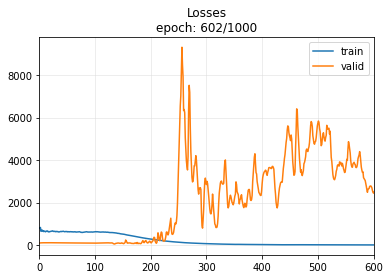

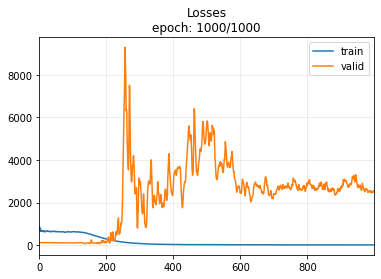

epoch,train_loss,valid_loss,mae,_rmse,time
0,804.772949,96.893089,9.246369,9.843429,00:00
1,825.415405,103.167496,9.595419,10.157140,00:00
2,830.233398,106.642868,9.781986,10.326803,00:00
3,650.345398,108.797569,9.895124,10.430608,00:00
4,687.341797,109.946167,9.955699,10.485521,00:00
5,712.406982,110.799973,10.000488,10.526156,00:00
6,656.360901,111.743301,10.048867,10.570870,00:00
7,679.196777,112.364906,10.080629,10.600231,00:00
8,637.562439,112.847328,10.105058,10.622962,00:00
9,659.121521,113.091225,10.116934,10.634436,00:00


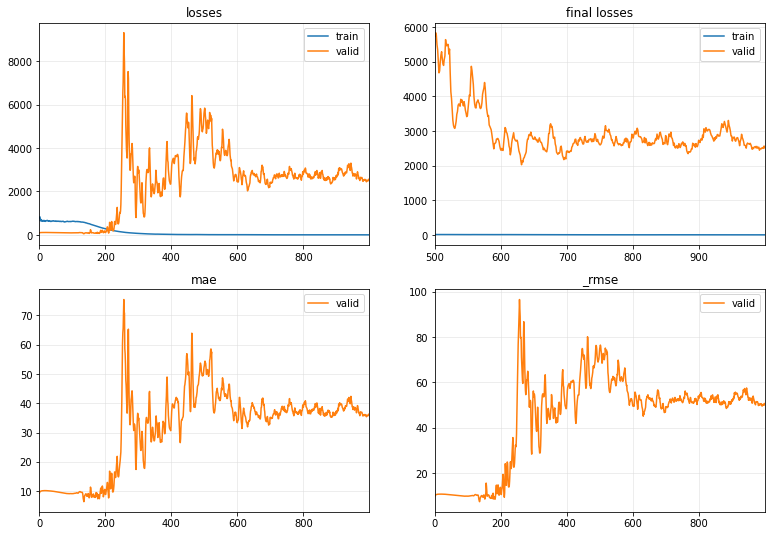

In [13]:
reg_12 = TSRegressor(X, y_12, path='models', arch=TSTPlus, metrics=[mae, rmse], cbs=ShowGraph(), verbose=True)
reg_12.fit_one_cycle(1000, 3e-4)

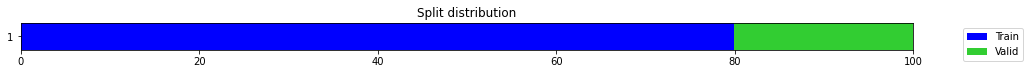

arch: TSTPlus(c_in=13 c_out=1 seq_len=9 device=cpu, arch_config={}, kwargs={})


epoch,train_loss,valid_loss,mae,_rmse,time
0,3.266870,1.206958,0.962631,1.098616,00:00
1,3.325681,1.685469,1.111179,1.298256,00:00
2,3.339804,1.931541,1.224189,1.389799,00:00
3,3.344678,2.094756,1.296070,1.447327,00:00
4,3.275192,2.199490,1.339877,1.483068,00:00
5,3.287618,2.259557,1.363516,1.503182,00:00
6,3.243385,2.301250,1.380335,1.516987,00:00
7,3.214951,2.330425,1.392848,1.526573,00:00
8,3.152815,2.335067,1.395588,1.528093,00:00
9,3.129666,2.348207,1.400880,1.532386,00:00


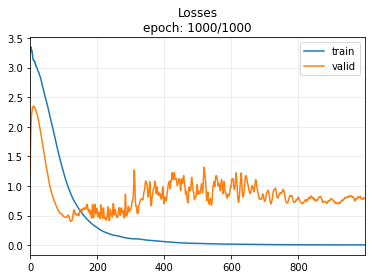

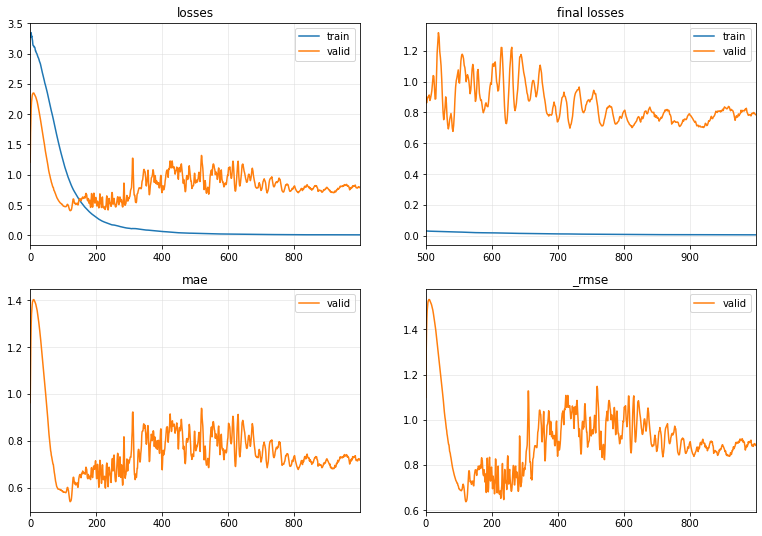

In [14]:
reg_13 = TSRegressor(X, y_13, path='models', arch=TSTPlus, metrics=[mae, rmse], cbs=ShowGraph(), verbose=True)
reg_13.fit_one_cycle(1000, 3e-4)

In [15]:
# Predictions for var 9, 10, 11, 12, 13
_, target_9, preds_9 = reg_9.get_X_preds(X, y_9)
_, target_10, preds_10 = reg_10.get_X_preds(X, y_10)
_, target_11, preds_11 = reg_11.get_X_preds(X, y_11)
_, target_12, preds_12 = reg_12.get_X_preds(X, y_12)
_, target_13, preds_13 = reg_13.get_X_preds(X, y_13)

# preds_{var} contains the predictions

In [16]:
preds_9
preds_10
preds_11
preds_12
preds_13

([1.9343366622924805],
 [0.7997533082962036],
 [1.5022231340408325],
 [1.9497886896133423],
 [1.780850887298584],
 [1.1191706657409668],
 [3.1633408069610596],
 [0.7156605124473572],
 [0.8437544107437134],
 [1.8477619886398315],
 [0.5561644434928894],
 [1.3099912405014038],
 [1.3055119514465332],
 [1.4631428718566895],
 [1.956138253211975],
 [2.565112829208374],
 [0.45917680859565735],
 [1.6213277578353882],
 [1.293014407157898],
 [0.7581613659858704],
 [0.8196169137954712],
 [1.534891963005066],
 [0.9849905371665955],
 [1.351232886314392],
 [1.580234408378601],
 [1.0295554399490356],
 [1.0073941946029663],
 [1.1692442893981934],
 [1.1864802837371826],
 [3.409342050552368],
 [1.2876144647598267],
 [2.166327476501465],
 [0.8264421820640564],
 [1.704807996749878],
 [1.5405884981155396],
 [2.3720974922180176],
 [1.8873690366744995],
 [1.205522894859314],
 [1.8606303930282593],
 [1.9781557321548462],
 [1.9339171648025513],
 [1.6121231317520142],
 [1.5527746677398682],
 [1.5436581373214722]